# matplotlib

In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## Library

In [38]:
import matplotlib
import matplotlib.pyplot as plt

from plydata import define, query, select, group_by, summarize, arrange, head, rename
import plotnine
from plotnine import *

## Sample Data
This chapter uses the sample data generate with below code. The idea is to simulate two categorical-alike feature, and two numeric value feature:

- com is random character between ‘C1’, ‘C2’ and ‘C3’    
- dept is random character between ‘D1’, ‘D2’, ‘D3’, ‘D4’ and ‘D5’  
- grp is random character with randomly generated ‘G1’, ‘G2’  
- value1 represents numeric value, normally distributed at mean 50  
- value2 is numeric value, normally distributed at mean 25  

In [39]:
n = 200
comp = ['C' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 3x Company
dept = ['D' + i for i in np.random.randint( 1,6, size  = n).astype(str)] # 5x Department
grp =  ['G' + i for i in np.random.randint( 1,3, size  = n).astype(str)] # 2x Groups
value1 = np.random.normal( loc=50 , scale=5 , size = n)
value2 = np.random.normal( loc=20 , scale=3 , size = n)
value3 = np.random.normal( loc=5 , scale=30 , size = n)

mydf = pd.DataFrame({
    'comp':comp, 
    'dept':dept, 
    'grp': grp,
    'value1':value1, 
    'value2':value2,
    'value3':value3 })
mydf.head()

  comp dept grp     value1     value2     value3
0   C3   D3  G1  50.570693  22.155870  31.085584
1   C3   D3  G2  52.090185  19.690222  37.367207
2   C1   D5  G2  38.029751  23.181581 -41.430184
3   C3   D4  G2  52.798923  16.951020  -3.897431
4   C1   D5  G1  56.436431  15.160784 -18.993753

In [40]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
comp      200 non-null object
dept      200 non-null object
grp       200 non-null object
value1    200 non-null float64
value2    200 non-null float64
value3    200 non-null float64
dtypes: float64(3), object(3)
memory usage: 9.5+ KB


## MATLAB-like API

- The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots.  
- However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.  
- Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with.

### Sample Data

In [41]:
# Sample Data
x = np.linspace(0,5,10)
y = x ** 2

### Single Plot

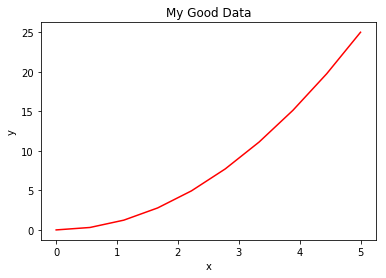

In [42]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'red')
plt.title('My Good Data');

### Two Plots

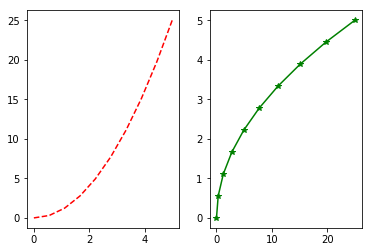

In [43]:
plt.figure()
plt.subplot(1,2,1) # 1 row, 2 cols, at first box
plt.plot(x,y,'r--')
plt.subplot(1,2,2) # 1 row, 2 cols, at second box
plt.plot(y,x,'g*-');

## Object-Oriented API

### Sample Data

In [59]:
# Sample Data
x = np.linspace(0,5,10)
y = x ** 2

### Single Plot

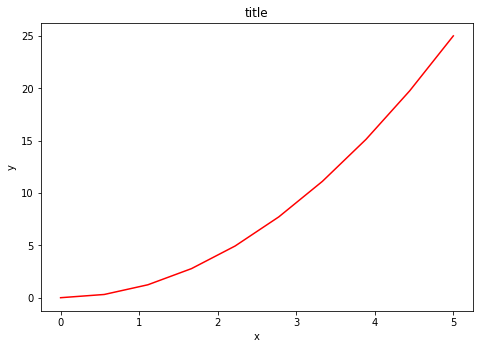

In [45]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Plot in Plot
This is still considered a single plot

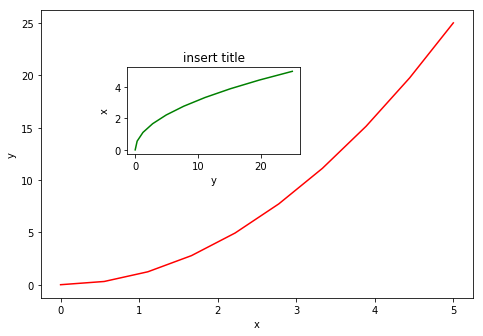

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])         # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(y, x, 'g')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('insert title');

### Multiple Plots

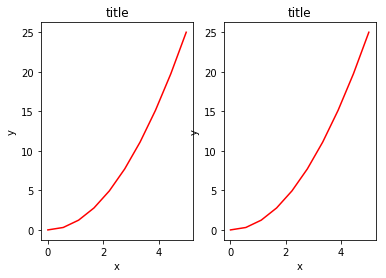

In [71]:
fig, axes = plt.subplots( nrows=1,ncols=2 )
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

#### Avoid Overlap - Use tight_layout()
Observice 'y' label is overlapped. 
- **tight_layout()** will introduce extra white space in between the subplots to avoid overlap.  
- The figure became wider.

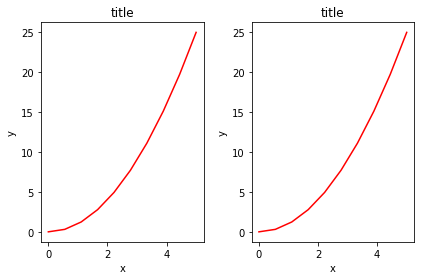

In [72]:
fig, axes = plt.subplots( nrows=1,ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
fig.tight_layout() # adjust the positions of axes so that there is no overlap

#### Avoid Overlap - Change Figure Size

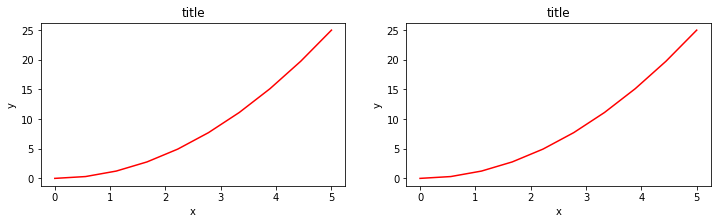

In [73]:
fig, axes = plt.subplots( nrows=1,ncols=2,figsize=(12,3))
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

## Grid Manager

### subplot

#### Manual Plotting

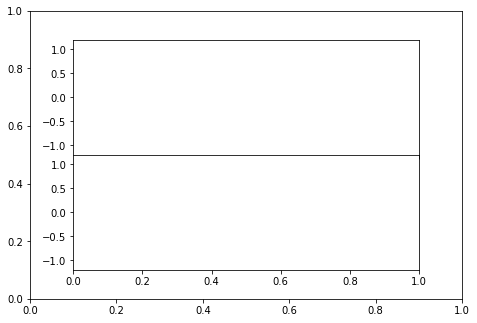

In [48]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))


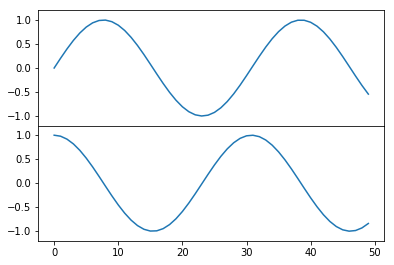

In [49]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

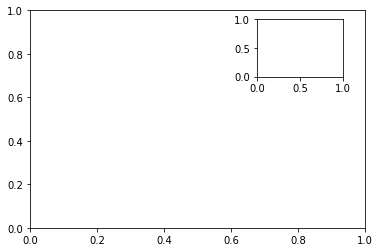

In [50]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

#### Create Subplot Individually
Each call lto **subplot()** will create a new container for subsequent plot command 

Text(0.5,0.5,'eight')

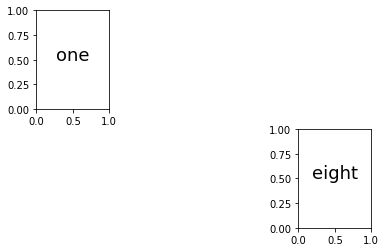

In [51]:
plt.subplot(2,4,1)
plt.text(0.5, 0.5, 'one',fontsize=18, ha='center')

plt.subplot(2,4,8)
plt.text(0.5, 0.5, 'eight',fontsize=18, ha='center')

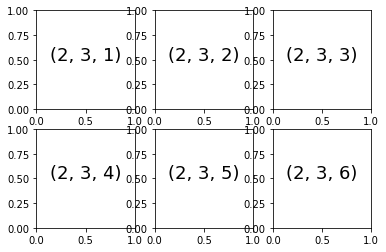

In [52]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

#### Create Subplots Upfront
**subplots()** returns two variables:  
- fig : reference to the entire container  
- ax  : reference to individual plot. It is an array

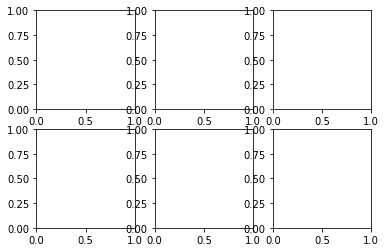

In [53]:
fig, ax = plt.subplots(2, 3) # individual axes

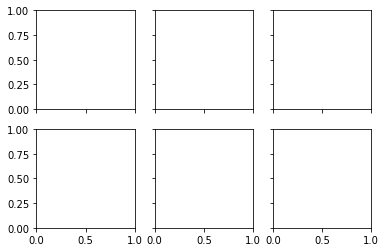

In [54]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') # removed inner label

**Iterate through subplots (ax) to populate them**

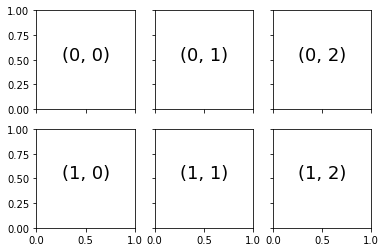

In [55]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

#### Complicated Arrangement

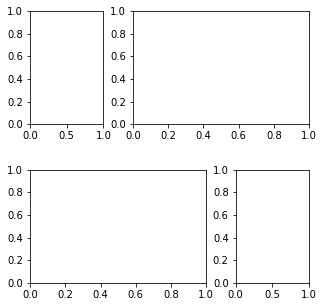

In [56]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.4)
plt.subplot(grid[0, 0])  #row 0, col 0
plt.subplot(grid[0, 1:]) #row 0, col 1 to :
plt.subplot(grid[1, :2]) #row 1, col 0:2 
plt.subplot(grid[1, 2])  #ro2 1, col 2

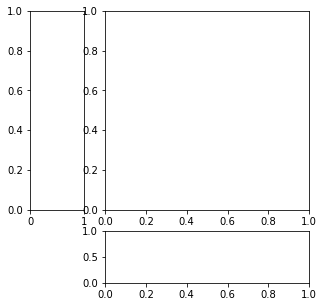

In [57]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
plt.subplot(grid[:3, 0])    # row 0:3, col 0
plt.subplot(grid[:3, 1: ])  # row 0:3, col 1:
plt.subplot(grid[3, 1: ]);   # row 3,   col 1:

**-1 means last row or column**

In [ ]:
plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=1.2)
plt.subplot(grid[:-1, 0 ])  # row 0 till last row (not including last row), col 0
plt.subplot(grid[:-1, 1:])  # row 0 till last row (not including last row), col 1 till end
plt.subplot(grid[-1, 1: ]); # row last row, col 1 till end

## Histogram

### 1xNumeric

#### Using matplotlib

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.hist(mydf.value1);  # default 10 bins

plt.subplot(1,2,2)
plt.hist(mydf.value1, bins=15);

#### Using Plotnine
```
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( bins=10 )
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( binwidth=? )
```

In [ ]:
plotnine.options.figure_size = (3, 3)
ggplot(mydf, aes(x='value1')) + geom_histogram()  # default bins = 10

In [ ]:
ggplot(mydf, aes(x='value1')) + geom_histogram(bins = 15)

In [ ]:
ggplot(mydf, aes(x='value1')) + geom_histogram(binwidth = 3)

### 1xNumeric + 1xCategorical

```
plotnine.ggplot( dataframe, 
                    aes(x='colName'), 
                    fill='categorical-alike-colName') 
+ geom_histogram()
```

In [ ]:
ggplot(mydf, aes(x='value1', fill='grp')) + geom_histogram(bins=15)

## Scatter Plot

### 2x Numeric

In [ ]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point()

### 2x Numeric + 1x Categorical
```
ggplot( DataFrame, aes(x='colName1',y='colName2')) 
    + geom_point( aes(
        color='categorical-alike-colName',
        size='numberColName'
    ))
```

In [ ]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point(aes(color='grp'))

In [ ]:
ggplot(mydf, aes(x='value1',y='value2',color='grp')) + geom_point()

In [ ]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes(
        color='grp'
    ))

### 2x Numeric + 1x Numeric + 1x Categorical

In [ ]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes( 
        color='grp', size='value3'
    ))

### Overlay Smooth Line

In [ ]:
ggplot(mydf, aes(x='value1', y='value2')) + \
    geom_point() + \
    geom_smooth()          # default method='loess'

In [ ]:
ggplot(mydf, aes(x='value1', y='value2',fill='grp')) + \
    geom_point() + \
    geom_smooth(
        se=True,
        color='red',
        method='lm', 
        level=0.75)

## Line Chart

### 2x Numeric Data

In [ ]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line()

### 1x Numeric, 1x Categorical

In [ ]:
ggplot (mydf.head(15), aes(x='dept', y='value1')) + geom_line()

In [ ]:
ggplot (mydf.head(30), aes(x='dept', y='value1')) + geom_line( aes(group=1))

### 2x Numeric, 1x Categorical

In [ ]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line( aes(color='grp'),size=2)

## Bar Chart

#### 1x Categorical
Single categorical variable produces frequency chart.

In [ ]:
tmpdf = mydf.groupby(['comp'],as_index=False).count()
tmpdf

In [ ]:
tmpdf.info()

In [ ]:
ggplot (tmpdf, aes(x='comp', y='grp')) +geom_col()